In [1]:
#!conda create -n fscount python=3.7 -y
#!conda activate fscount
!python -m pip install matplotlib opencv-python notebook tqdm
!pip install pytorch==1.4.0 torchvision==0.5.0 cudatoolkit=10.0 -c pytorch

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'pytorch'


In [2]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/CSE512_Homework_6/LearningToCountEverything-master

/content/gdrive/MyDrive/CSE512_Homework_6/LearningToCountEverything-master


In [ ]:
!python demo.py --input-image orange.jpg --bbox-file orange_box_ex.txt 


/usr/bin/python3
Bounding boxes: [[71, 49, 104, 83], [134, 119, 169, 151], [7, 200, 44, 236]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
===> The predicted count is:  29.15
===> Visualized output is saved to ./orange_out.png


In [ ]:
!python demo.py --input-image orange.jpg

/usr/bin/python3
: cannot connect to X server 


**QUESTION 2.2:**

I manually save the output of the following to the file called part2_output.txt since it seemed simplest.

In [ ]:

!python test.py --data_path data/ --test_split val 


Evaluation on val data
  0% 0/1286 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
HEREEEEEEEEEEEEEEEEee
190.jpg : actual-predicted:     13,   60.9, error:   47.9. Current MAE: 47.91, RMSE: 47.91:   0% 0/1286 [00:00<?, ?it/s]
HEREEEEEEEEEEEEEEEEee
191.jpg : actual-predicted:     15,   16.3, error:    1.3. Current MAE: 24.60, RMSE: 33.89:   0% 0/1286 [00:00<?, ?it/s]
191.jpg : actual-predicted:     15,   16.3, error:    1.3. Current MAE: 24.60, RMSE: 33.89:   0% 2/1286 [00:00<07:37,  2.80it/s]HEREEEEEEEEEEEEEEEEee
192.jpg : actual-predicted:     19,   16.9, error:    2.1. Current MAE: 17.09, RMSE: 27.69:   0% 2/1286 [00:01<07:37,  2.80it/s]
192.jpg : actual-predicted

In [4]:
import matplotlib.pyplot as plt
import csv
import heapq
import numpy as np

In [5]:
#read from txt and parse ==> for actual number and predicted number
def read_file_get_predict_act(fileName):
  file = open(fileName, "r")
  start = 0
  img_names = []
  actual = []
  predicted = []
  for line in file:
    if(start>3):
      line = line.split(":")
      if(len(line)==9):
        #img names
        img_names.append(line[0])

        #get actual and predicted values
        line[2] = line[2].replace(" ", "")
        line[2] = line[2].split(",")

        actual.append(float(line[2][0]))
        predicted.append(float(line[2][1]))
    start = start + 1

  img_names = np.array(img_names)
  actual = np.array(actual)
  predicted = np.array(predicted)

  return img_names, actual, predicted

In [7]:
img_names, actual, predicted = read_file_get_predict_act("part2_output.txt")


In [9]:
def scatter_plot(ground_truth, predicted, title_add = None):
    plt.scatter(ground_truth, predicted)
    plt.xlabel("Ground Truth Count")
    plt.ylabel("Predicted Count")
    title = "Ground Truth Versus Predicted Count " 
    if(title_add!=None):
      title =  title + title_add 
    plt.title(title)
    plt.show()

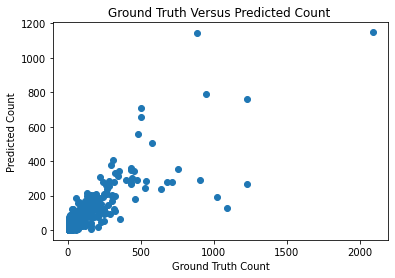

In [8]:
scatter_plot(actual,predicted)

In [10]:
difference_pgt = []
#highest predicted count to ground truth count
for i in range(0,len(predicted)):
  difference_pgt.append(predicted[i] - actual[i])

difference_pgt = np.array(difference_pgt)
ind_pgt = np.argpartition(difference_pgt, -5)[-5:]
for i in range(0,len(imgs_pgt)):
  imgs_pgt[i] = imgs_pgt[i].replace(" ", "")
#print(ind_pgt)
imgs_pgt = img_names[ind_pgt]
#names of files
print(imgs_pgt)

NameError: ignored

In [ ]:
#highest ground truth count to predicted count
difference_gtp = []
for i in range(0,len(predicted)):
  difference_gtp.append(actual[i] - predicted[i])

difference_gtp = np.array(difference_gtp)
ind_gtp = np.argpartition(difference_gtp, -5)[-5:]
print(ind_gtp)
imgs_gtp = img_names[ind_gtp]
for i in range(0,len(imgs_gtp)):
  imgs_gtp[i] = imgs_gtp[i].replace(" ", "")

#names of files
print(imgs_gtp)

[ 527  229 1132  195  221]
['3665.jpg' '949.jpg' '7656.jpg' '865.jpg' '935.jpg']


In [ ]:
#combine data for next part
imgs = np.append(imgs_pgt, imgs_gtp)

In [ ]:
anno_file = "data/annotation_Val_Test_384_VarV2.json"
annotations = None
with open(anno_file) as f:
    annotations = json.load(f)

#get annotated bounding boxes and export as txt files
box_data = []
for i in range(0,len(imgs)):
  temp_name = imgs[i].split(".")[0]
  file_name = temp_name + "_box.txt"
  temp = annotations[imgs[i]]['box_examples_coordinates']
  with open(file_name, 'w') as the_file:
    for j in range(0,len(temp)):
      first_part = str(temp[j][0][1])+ " " + str(temp[j][0][0]) + " "
      second_part =str(temp[j][2][1]) + " " + str(temp[j][2][0])     
      the_file.write(first_part + second_part + '\n')
  box_data.append(annotations[imgs[i]]['box_examples_coordinates'])

#export as txt files
#for i in range(0,len(box_data)
print(box_data)
#print(len(box_data[0][0]))

[[[[366, 234], [366, 261], [391, 261], [391, 234]], [[161, 122], [161, 149], [188, 149], [188, 122]], [[309, 197], [309, 226], [336, 226], [336, 197]]], [[[306, 293], [306, 297], [312, 297], [312, 293]], [[367, 189], [367, 196], [381, 196], [381, 189]], [[73, 202], [73, 208], [90, 208], [90, 202]], [[137, 232], [137, 239], [149, 239], [149, 232]]], [[[244, 202], [244, 209], [252, 209], [252, 202]], [[167, 169], [167, 176], [175, 176], [175, 169]], [[228, 148], [228, 157], [240, 157], [240, 148]]], [[[228, 150], [228, 154], [235, 154], [235, 150]], [[251, 166], [251, 171], [257, 171], [257, 166]], [[275, 183], [275, 187], [280, 187], [280, 183]]], [[[111, 113], [111, 124], [128, 124], [128, 113]], [[233, 136], [233, 148], [248, 148], [248, 136]], [[341, 98], [341, 110], [361, 110], [361, 98]]], [[[225, 130], [225, 134], [232, 134], [232, 130]], [[247, 180], [247, 185], [255, 185], [255, 180]], [[286, 234], [286, 242], [295, 242], [295, 234]]], [[[258, 150], [258, 160], [266, 160], [266,

In [ ]:
#just get names again
for i in range(0,len(imgs_pgt)):
  temp = imgs_pgt[i].split(".")[0]
  print(imgs_pgt[i])
  print(temp + "_box.txt")
  print("\n")

1994.jpg
1994_box.txt


7477.jpg
7477_box.txt


3437.jpg
3437_box.txt


3425.jpg
3425_box.txt


1936.jpg
1936_box.txt




In [ ]:
!python demo.py --input-image /content/gdrive/MyDrive/CSE512_Homework_6/LearningToCountEverything-master/data/images_384_VarV2/1994.jpg --bbox-file 1994_box.txt
!python demo.py --input-image /content/gdrive/MyDrive/CSE512_Homework_6/LearningToCountEverything-master/data/images_384_VarV2/7477.jpg --bbox-file 7477_box.txt
!python demo.py --input-image /content/gdrive/MyDrive/CSE512_Homework_6/LearningToCountEverything-master/data/images_384_VarV2/3437.jpg --bbox-file 3437_box.txt
!python demo.py --input-image /content/gdrive/MyDrive/CSE512_Homework_6/LearningToCountEverything-master/data/images_384_VarV2/3425.jpg --bbox-file 3425_box.txt
!python demo.py --input-image /content/gdrive/MyDrive/CSE512_Homework_6/LearningToCountEverything-master/data/images_384_VarV2/1936.jpg --bbox-file 1936_box.txt

/usr/bin/python3
Bounding boxes: [[234, 366, 261, 391], [122, 161, 149, 188], [197, 309, 226, 336]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
===> The predicted count is: 407.36
===> Visualized output is saved to ./1994_out.png
/usr/bin/python3
Bounding boxes: [[293, 306, 297, 312], [189, 367, 196, 381], [202, 73, 208, 90], [232, 137, 239, 149]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for d

In [ ]:
#just get names again
for i in range(0,len(imgs_gtp)):
  temp = imgs_gtp[i].split(".")[0]
  print(imgs_gtp[i])
  print(temp + "_box.txt")
  print("\n")

3665.jpg
3665_box.txt


949.jpg
949_box.txt


7656.jpg
7656_box.txt


865.jpg
865_box.txt


935.jpg
935_box.txt




In [ ]:
!python demo.py --input-image /content/gdrive/MyDrive/CSE512_Homework_6/LearningToCountEverything-master/data/images_384_VarV2/3665.jpg --bbox-file 3665_box.txt
!python demo.py --input-image /content/gdrive/MyDrive/CSE512_Homework_6/LearningToCountEverything-master/data/images_384_VarV2/949.jpg --bbox-file 949_box.txt
!python demo.py --input-image /content/gdrive/MyDrive/CSE512_Homework_6/LearningToCountEverything-master/data/images_384_VarV2/7656.jpg --bbox-file 7656_box.txt
!python demo.py --input-image /content/gdrive/MyDrive/CSE512_Homework_6/LearningToCountEverything-master/data/images_384_VarV2/865.jpg --bbox-file 865_box.txt
!python demo.py --input-image /content/gdrive/MyDrive/CSE512_Homework_6/LearningToCountEverything-master/data/images_384_VarV2/935.jpg --bbox-file 935_box.txt

/usr/bin/python3
Bounding boxes: [[130, 225, 134, 232], [180, 247, 185, 255], [234, 286, 242, 295]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
===> The predicted count is: 290.54
===> Visualized output is saved to ./3665_out.png
/usr/bin/python3
Bounding boxes: [[150, 258, 160, 266], [88, 254, 97, 263], [281, 309, 297, 334]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


**QUESTION 2.3:**

I duplicated test.py into test2.py and made some alterations from there to accomodate the new loss.

In [46]:
!python test2.py --data_path data/ --test_split val_PartA --adapt


Evaluation on val_PartA data
  0% 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/content/gdrive/MyDrive/CSE512_Homework_6/LearningToCountEverything-master/utils.py:99: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect r

In [13]:
!python test.py --data_path data/ --test_split val_PartA #need to double check which part this goes to

Evaluation on val_PartA data
  0% 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
2851.jpg: actual-predicted:     61,   17.6, error:   43.4. Current MAE: 43.41, RMSE: 43.41:   0% 0/100 [00:00<?, ?it/s]
4167.jpg: actual-predicted:     10,   14.6, error:    4.6. Current MAE: 24.02, RMSE: 30.87:   0% 0/100 [00:00<?, ?it/s]
4105.jpg: actual-predicted:     12,   27.4, error:   15.4. Current MAE: 21.13, RMSE: 26.72:   2% 2/100 [00:00<00:10,  9.77it/s]
5890.jpg: actual-predicted:     33,   33.5, error:    0.5. Current MAE: 15.98, RMSE: 23.14:   2% 2/100 [00:00<00:10,  9.77it/s]
253.jpg : actual-predicted:    192,  170.3, error:   21.7. Current MAE: 17.13, RMSE: 22.87

In [19]:
#create blank text files
f= open("part3_with_adapt.txt","w+")
f.close()
f= open("part3_no_adapt.txt","w+")
f.close()

In [21]:
def new_read_text(file_name, start_pos=3):
  file = open(file_name, "r")
  start = 0
  img_names = []
  actual = []
  predicted = []
  for line in file:
    if(start>start_pos):
      line = line.split(":")
      if(len(line)==9):

        #get actual and predicted values
        line[2] = line[2].replace(" ", "")
        line[2] = line[2].split(",")

        if(line[0] not in img_names):
          #img names
          img_names.append(line[0])

          actual.append(float(line[2][0]))
          predicted.append(float(line[2][1]))
    start = start + 1

  img_names = np.array(img_names)
  actual = np.array(actual)
  predicted = np.array(predicted)

  return img_names, actual, predicted


In [22]:
#img_names_adapt, actual_adapt, predicted_adapt = read_file_get_predict_act("part3_with_adapt.txt")
img_names_adapt, actual_adapt, predicted_adapt = new_read_text("part3_with_adapt.txt", start_pos=-1)
img_names_no_adapt, actual_no_adapt, predicted_no_adapt = read_file_get_predict_act("part3_no_adapt.txt")

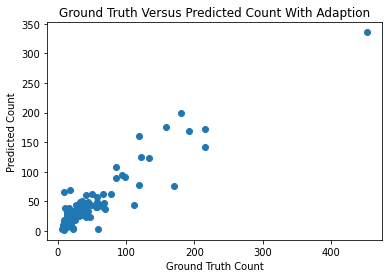

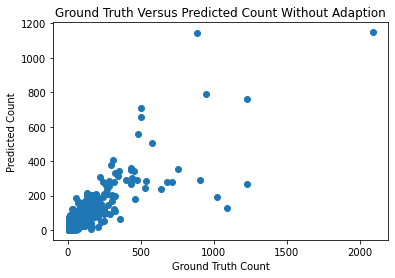

In [23]:
scatter_plot(actual_adapt,predicted_adapt, "With Adaption")
scatter_plot(actual_no_adapt,predicted_no_adapt, "Without Adaption")

**Question 2.4:**

In [75]:
!python test2.py --data_path data/ --test_split test_PartA --adapt

Evaluation on test_PartA data
  0% 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/content/gdrive/My Drive/CSE512_Homework_6/LearningToCountEverything-master/utils.py:99: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect

In [25]:
#create blank text files
f= open("part4_with_adapt.txt","w+")
f.close()

In [99]:
def new_read_text2(file_name, start_pos=3):
  file = open(file_name, "r")
  start = 0
  img_names = []
  actual = []
  predicted = []
  for line in file:
    #if(start>start_pos):
    line = line.split(":")
    if((len(line)==9)or(len(line)==8)):
      #get actual and predicted values
      line[2] = line[2].replace(" ", "")
      line[2] = line[2].split(",")

      line[0] = line[0].replace(" ", "")
      print(line[0] in img_names)
      if(line[0] not in img_names):
        print(line[0])
        #img names
        img_names.append(line[0])

        actual.append(float(line[2][0]))
        predicted.append(float(line[2][1]))
    #start = start + 1

  img_names = np.array(img_names)
  actual = np.array(actual)
  predicted = np.array(predicted)

  return img_names, actual, predicted

In [100]:
img_names_testA, actual_testA, predicted_testA = new_read_text2("part4_with_adapt.txt", start_pos=-1)

False
6268.jpg
False
7598.jpg
False
4967.jpg
False
289.jpg
False
2241.jpg
False
5821.jpg
False
5591.jpg
False
5917.jpg
False
4413.jpg
False
695.jpg
False
5850.jpg
False
7523.jpg
False
299.jpg
False
1464.jpg
False
2933.jpg
False
2043.jpg
False
3338.jpg
False
7239.jpg
False
342.jpg
False
5809.jpg
False
4300.jpg
False
5593.jpg
False
3502.jpg
False
6050.jpg
False
6244.jpg
False
4906.jpg
False
5792.jpg
False
5506.jpg
False
4497.jpg
False
906.jpg
False
5924.jpg
False
704.jpg
False
1461.jpg
False
2174.jpg
False
7707.jpg
False
2150.jpg
False
3329.jpg
False
7605.jpg
False
2176.jpg
False
4901.jpg
False
4880.jpg
False
2247.jpg
False
6650.jpg
False
5919.jpg
False
7683.jpg
False
4073.jpg
False
4933.jpg
False
2010.jpg
False
298.jpg
False
2619.jpg
False
3279.jpg
False
4406.jpg
False
6971.jpg
False
6659.jpg
False
6839.jpg
False
7146.jpg
False
3282.jpg
False
2051.jpg
False
2949.jpg
False
2225.jpg
False
5386.jpg
False
7386.jpg
False
1106.jpg
False
5849.jpg
False
3653.jpg
False
4958.jpg
False
3647.jpg
Fa

In [86]:
import json
#get all Test data and output
data_split_file = 'data/Train_Test_Val_FSC147_HW6_Split.json'
data_split = None
with open(data_split_file) as f:
    data_split = json.load(f)
img_idsB = data_split["test_PartB"]
if("2.jpg" in img_idsB):
  print("here")

#test_id =img_names_testA 
#list(test_id).extend(img_idsB)
#test_id = np.array(test_id)
test_id = np.concatenate((img_names_testA, img_idsB), axis=None)
print(len(test_id))

zeros = np.array([0 for i in range(0,len(img_idsB))])
count = np.concatenate((predicted_testA, zeros),axis=None)
#anno_file = 'data/annotation_Val_Test_384_VarV2.json'
#annotations = None
#with open(anno_file) as f:
#    annotations = json.load(f)

1189


In [79]:
#function to creat csv file for id and count
def create_out_csv(title, id, count):
    with open(title, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Id", "Count"])
        for i in range(0, len(id)):
            writer.writerow([str(id[i]), str(count[i])])

In [80]:
#create csv for predicted test A
create_out_csv("Question_2_4.csv", test_id, count)

**Question 2.5:**

In [ ]:
!python test2.py --data_path data/ --test_split test_PartB --adapt

In [ ]:
#seperate values
img_names_testB, actual_testB, predicted_testB = read_file_get_predict_act("part5_with_adapt.txt")

In [ ]:
#count list
count = predicted_testA + predicted_testB

In [ ]:
#create csv for predicted test A and predicted test B
create_out_csv("Question_2_5.csv", test_id, count)